`해리포터와 마법사의 돌 tf-idf dataframe, 워드 클라우드 생성`
======


----


## 1.  https://movie.naver.com/movie/bi/mi/basic.nhn?code=30688 링크로 `해리포터와 마법사의 돌 줄거리 내용 크롤링`



In [1]:
from bs4 import BeautifulSoup
import requests 

url= 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=30688'
res = requests.get(url)
source = BeautifulSoup(res.text,'html.parser')

text = source.find_all('p',{'class':"con_tx"})
text = str(text)
print(text)

[<p class="con_tx">해리 포터(다니엘 래드클리프 분)는 위압적인 버논 숙부(리챠드 그리피스 분)와 냉담한 이모 페투니아 (피오나 쇼 분), 욕심 많고 버릇없는 사촌 더즐리(해리 멜링 분) 밑에서 갖은 구박을 견디며 계단 밑 벽장에서 생활한다. 이모네 식구들 역시 해리와의 동거가 불편하기는 마찬가지. 이모 페투니아에겐 해리가 이상한(?) 언니 부부에 관한 기억을 떠올리게 만드는 달갑지 않은 존재다. 11살 생일이 며칠 앞으로 다가왔지만 한번도 생일파티를 치르거나 제대로 된 생일선물을 받아 본 적이 없는 해리로서는 특별히 신날 것도 기대 할 것도 없다. 11살 생일을 며칠 앞둔 어느 날 해리에게 초록색 잉크로 쓰여진 한 통의 편지가 배달된다. 그 편지의 내용은 다름 아닌 해리의 11살 생일을 맞이하여 전설적인“호그와트 마법학교”에서 보낸 입학초대장이었다. 그리고 해리의 생일을 축하하러 온 거인 해그리드는 해리가 모르고 있었던 해리의 진정한 정체를 알려주는데. 그것은 바로 해리가 굉장한 능력을 지닌 마법사라는 것!<br/>  해리는 해그리드의 지시대로 자신을 구박하던 이모네 집을 주저없이 떠나 호그와트행을 택한다. 런던의 킹스크로스 역에 있는 비밀의 9와 3/4 승장장에서 호그와트 특급열차를 탄 해리는 열차 안에서 같은 호그와트 마법학교 입학생인 헤르미온느 그레인저(엠마 왓슨 분)와 론 위즐리 (루퍼트 그린트 분)를 만나 친구가 된다. 이들과 함께 호그와트에 입학한 해리는, 놀라운 모험의 세계를 경험하며 갖가지 신기한 마법들을 배워 나간다. 또한 빗자루를 타고 공중을 날아다니며 경기하는 스릴 만점의 퀴디치 게임에서 스타로 탄생하게 되며, 용, 머리가 셋 달린 개, 유니콘, 켄타우루스, 히포그리프(말 몸에 독수리 머리와 날개를 가진 괴물)등 신비한 동물들과 마주치며 모험을 즐긴다. 그러던 어느 날 해리는 호그와트 지하실에 `영원한 생을 가져다주는 마법사의 돌'이 비밀리에 보관되어 있다는 것을 알게되고, 해리의 부모님을 죽인 볼드모트가 그 돌을 노린다는 

----

## 2. `전처리 & 명사 tokenizing`

- 생각하신 방법대로 전처리해주세요.
- ####  regex (정규식) 이용해서 해주시면 편리합니다.

- #### 그 다음, Okt를 이용해서 명사만 추출해주세요.  


- 불용어를 제거하고 싶으시다면 따로 for문을 만드셔야 합니다. 참고 코드 첨부합니다.

~~~python
stopwords = ['''원하시는 불용어 입력, string type으로''']
noun_lst =[]
for i in nouns:
    if i not in stopwords:
        noun_lst.append(i)
~~~



In [2]:
### 정규식과 Okt 이용해 전처리 해주세요.
### 불용어를 제거하여 더 예쁜 결과를 얻고 싶으시다면 위의 코드를 참고하세요.

import re
from konlpy.tag import Okt

temp = re.sub('["`<>=[\]/_(),.“”?!]','',text)
temp = re.sub('[a-zA-Z]','',temp)
temp = re.sub("[']","",temp)
temp = re.sub('\xa0',"",temp)
temp = temp.replace(" ", '')
temp

okt = Okt()
nouns = okt.morphs(temp)

In [3]:
stopwords = ['는','의','과','와','이다','분','다','에','한','을','또한','로','를','가','것',
             '등','게','하','여','에서','하','되고','도','그']
noun_lst = []
for i in nouns:
    if i not in stopwords:
        noun_lst.append(i)
        
print(noun_lst)

['해리포터', '다니엘', '래드클리프', '위압', '적', '인', '버논', '숙부', '리', '챠드', '그리피스', '냉담한', '이모', '페투', '니아', '피오', '나', '쇼', '욕심', '많고', '버릇', '없는', '사촌', '더즐리', '해리', '멜', '링', '밑', '갖은', '구박', '견디며', '계단', '밑', '벽장', '생활', '이', '모네', '식구', '들', '역시', '해리', '와의', '동', '거가', '불편하기는', '마찬가지', '이모', '페투', '니아', '에겐', '해리', '이상한', '언니', '부부', '관', '기억', '떠올리게만', '드는', '달', '갑지', '않은', '존재', '11', '살생', '일이', '며칠', '앞', '으로', '다가왔지만', '한번', '생일', '파티', '치르거나', '제대로', '된', '생일', '선물', '받아', '본적', '이', '없는', '해리', '로서', '특별히', '신날것도', '기대할것도', '없다', '11', '살', '생일', '며칠', '앞둔', '어느', '날', '해리', '에게', '초록색', '잉크', '쓰여진', '통', '편지', '배달', '된', '다그', '편지', '내용', '은', '다름', '아닌', '해리', '11', '살', '생일', '맞이', '전설', '적', '인', '호그와트', '마법', '학교', '보낸', '입학', '초대장', '이었다', '그리고', '해리', '생일', '축하', '하러', '온거인', '해그리드', '해리', '모르고있었던', '해리', '진정한', '정체', '알려주는데', '그것', '은', '바로', '해리', '굉장한', '능력', '지닌', '마법사', '라는', '해리', '해그리드', '지시', '대로', '자신을구', '박하던', '이', '모네', '집', '주저', '없이', '떠나', '호그와트', '행', '택', '런던'



----

## `Tf-idf dataframe 생성`


- #### tfi-df 을 위해서는 텍스트 코퍼스가 list에 들어가있는 string 이어야 하지만, wordcloud를 만들기 위해서는 아예 string type이어야 합니다. 
- #### 때문에 우리는 다음과 같은 코드를 통해서 noun_list (변수 명은 다를 수 있습니다) 의 원소들을 모두 합친 `하나의 string 형태`를 만들어야 합니다.

~~~python

corpus=''
for i in range(len(noun_lst)):
    corpus += ' '+ noun_lst[i] 
    
    
~~~

- 그 후, **`Tfi-df dataframe` 과 `wordcloud`를 만들어 주세요.**

####  *단, dataframe의 열 이름은 0,1,3,4...가 아닌, 각각의 단어로 이루어져야 합니다.*


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd

corpus = ''
for i in range(len(noun_lst)):
    corpus += ' '+ noun_lst[i]

In [5]:
vectorizer = TfidfVectorizer()
vectorizer.fit(noun_lst)
vectorizer.vocabulary_
sorted(vectorizer.vocabulary_.items())

[('11', 0),
 ('34', 1),
 ('가져다주는', 2),
 ('가진', 3),
 ('간다', 4),
 ('갑지', 5),
 ('갖가지', 6),
 ('갖은', 7),
 ('같은', 8),
 ('거가', 9),
 ('게임', 10),
 ('견디며', 11),
 ('경기', 12),
 ('경험', 13),
 ('계단', 14),
 ('공중', 15),
 ('괴물', 16),
 ('굉장한', 17),
 ('구박', 18),
 ('그것', 19),
 ('그러던', 20),
 ('그리고', 21),
 ('그리피스', 22),
 ('그린', 23),
 ('기대할것도', 24),
 ('기억', 25),
 ('날개', 26),
 ('날아다니며', 27),
 ('남긴', 28),
 ('내용', 29),
 ('냉담한', 30),
 ('노력', 31),
 ('노린다는', 32),
 ('놀라운', 33),
 ('는바', 34),
 ('능력', 35),
 ('니아', 36),
 ('다가왔지만', 37),
 ('다그', 38),
 ('다니엘', 39),
 ('다름', 40),
 ('달린', 41),
 ('대로', 42),
 ('더즐리', 43),
 ('독수리', 44),
 ('돌이', 45),
 ('동물', 46),
 ('되며', 47),
 ('되어있다는', 48),
 ('된다', 49),
 ('된다이', 50),
 ('드는', 51),
 ('들과', 52),
 ('떠나', 53),
 ('떠올리게만', 54),
 ('라는', 55),
 ('래드클리프', 56),
 ('런던', 57),
 ('레인저', 58),
 ('로부터', 59),
 ('로서', 60),
 ('론위즐리', 61),
 ('루퍼트', 62),
 ('마법', 63),
 ('마법사', 64),
 ('마주치며', 65),
 ('마찬가지', 66),
 ('만나', 67),
 ('만점', 68),
 ('많고', 69),
 ('말몸', 70),
 ('맞이', 71),
 ('머리', 72),
 ('며칠', 73),
 (

In [6]:
vectorizer.get_feature_names()

['11',
 '34',
 '가져다주는',
 '가진',
 '간다',
 '갑지',
 '갖가지',
 '갖은',
 '같은',
 '거가',
 '게임',
 '견디며',
 '경기',
 '경험',
 '계단',
 '공중',
 '괴물',
 '굉장한',
 '구박',
 '그것',
 '그러던',
 '그리고',
 '그리피스',
 '그린',
 '기대할것도',
 '기억',
 '날개',
 '날아다니며',
 '남긴',
 '내용',
 '냉담한',
 '노력',
 '노린다는',
 '놀라운',
 '는바',
 '능력',
 '니아',
 '다가왔지만',
 '다그',
 '다니엘',
 '다름',
 '달린',
 '대로',
 '더즐리',
 '독수리',
 '돌이',
 '동물',
 '되며',
 '되어있다는',
 '된다',
 '된다이',
 '드는',
 '들과',
 '떠나',
 '떠올리게만',
 '라는',
 '래드클리프',
 '런던',
 '레인저',
 '로부터',
 '로서',
 '론위즐리',
 '루퍼트',
 '마법',
 '마법사',
 '마주치며',
 '마찬가지',
 '만나',
 '만점',
 '많고',
 '말몸',
 '맞이',
 '머리',
 '며칠',
 '모네',
 '모르고있었던',
 '모양',
 '모험',
 '바로',
 '박하던',
 '받아',
 '배달',
 '배워나',
 '버논',
 '버릇',
 '번개',
 '벽장',
 '보관',
 '보낸',
 '본적',
 '볼드모트',
 '부모님',
 '부부',
 '불편하기는',
 '비밀',
 '비밀리',
 '빗자루',
 '사실',
 '사촌',
 '살생',
 '생일',
 '생활',
 '선물',
 '세계',
 '숙부',
 '스릴',
 '스타',
 '식구',
 '신기한',
 '신날것도',
 '신비한',
 '실패하고',
 '쓰여진',
 '아닌',
 '않은',
 '알려주는데',
 '앞둔',
 '어느',
 '언니',
 '없는',
 '없다',
 '없이',
 '에게',
 '에겐',
 '엠마왓슨',
 '역시',
 '열차',
 '영원한',
 '온거인',
 '와의',
 '욕심',
 '용머리',
 

In [7]:
array = vectorizer.transform(noun_lst).toarray()
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
df =pd.DataFrame(array)
df

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
lst = sorted(vectorizer.vocabulary_.items()) 

columns =[]
for i in range(len(lst)):
    columns.append(lst[i][0])
    
df.columns = [columns]
df

,11,34,가져다주는,가진,간다,갑지,갖가지,갖은,같은,거가,...,학교,한번,함께,해그리드,해리,해리포터,헤르미온느,호그와트,흉터,히포그리프
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


----

## ` WordCloud 시각화`

- **맥북이신 분들은 폰트 경로 잘 설정하셔야 해요. 참고 코드 확인해주세요.**

~~~python
# 원하시는 폰트 경로 설정해주셔야 합니다.
wordcloud = WordCloud(background_color='white',font_path = '/Library/Fonts/NanumSquareRoundB.ttf')

~~~




In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.unicode_minus'] = False

wordcloud = WordCloud(background_color='white',font_path = '/Library/Fonts/NanumSquareRegular.ttf')
wordcloud = wordcloud.generate_from_text(corpus)

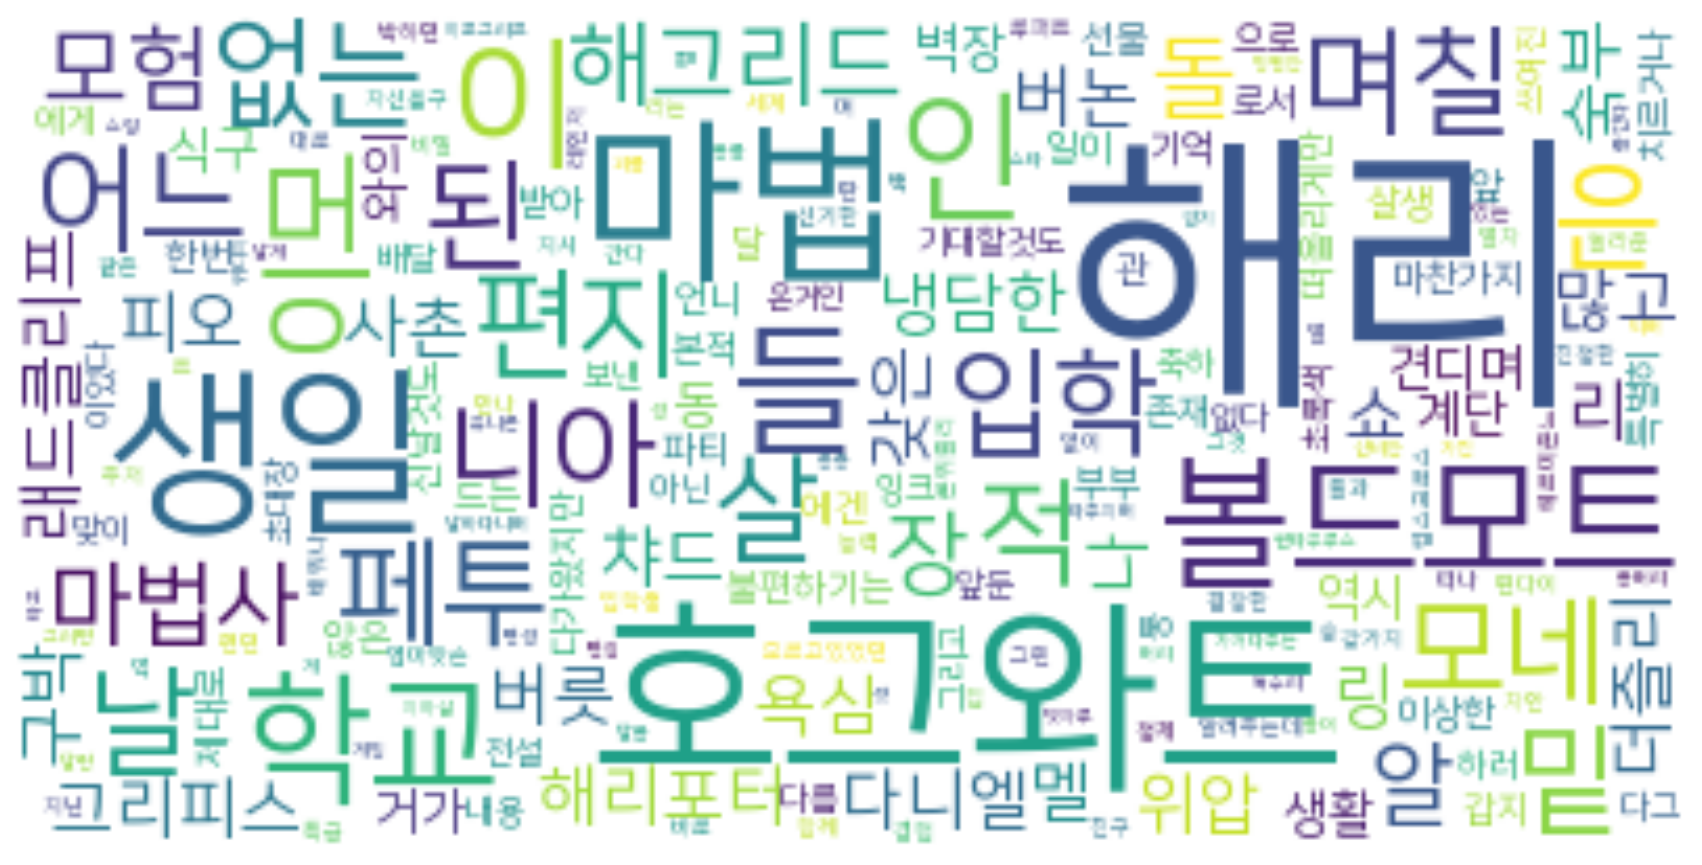

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show() 